<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Goal" data-toc-modified-id="Goal-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Goal</a></span></li><li><span><a href="#Var" data-toc-modified-id="Var-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Var</a></span></li><li><span><a href="#Init" data-toc-modified-id="Init-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Init</a></span></li><li><span><a href="#LLMGAG" data-toc-modified-id="LLMGAG-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>LLMGAG</a></span><ul class="toc-item"><li><span><a href="#Setup" data-toc-modified-id="Setup-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Setup</a></span><ul class="toc-item"><li><span><a href="#Run" data-toc-modified-id="Run-4.1.1"><span class="toc-item-num">4.1.1&nbsp;&nbsp;</span>Run</a></span></li></ul></li></ul></li><li><span><a href="#--WAITING--" data-toc-modified-id="--WAITING---5"><span class="toc-item-num">5&nbsp;&nbsp;</span>--WAITING--</a></span></li><li><span><a href="#Summary" data-toc-modified-id="Summary-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Summary</a></span><ul class="toc-item"><li><span><a href="#Number-of-genes-assembled-&amp;-clustered" data-toc-modified-id="Number-of-genes-assembled-&amp;-clustered-6.1"><span class="toc-item-num">6.1&nbsp;&nbsp;</span>Number of genes assembled &amp; clustered</a></span></li><li><span><a href="#Taxonomy" data-toc-modified-id="Taxonomy-6.2"><span class="toc-item-num">6.2&nbsp;&nbsp;</span>Taxonomy</a></span><ul class="toc-item"><li><span><a href="#Summary" data-toc-modified-id="Summary-6.2.1"><span class="toc-item-num">6.2.1&nbsp;&nbsp;</span>Summary</a></span></li></ul></li><li><span><a href="#Annotations" data-toc-modified-id="Annotations-6.3"><span class="toc-item-num">6.3&nbsp;&nbsp;</span>Annotations</a></span><ul class="toc-item"><li><span><a href="#COG-functional-categories" data-toc-modified-id="COG-functional-categories-6.3.1"><span class="toc-item-num">6.3.1&nbsp;&nbsp;</span>COG functional categories</a></span></li><li><span><a href="#Grouped-by-taxonomy" data-toc-modified-id="Grouped-by-taxonomy-6.3.2"><span class="toc-item-num">6.3.2&nbsp;&nbsp;</span>Grouped by taxonomy</a></span></li></ul></li><li><span><a href="#humann2-db-genes" data-toc-modified-id="humann2-db-genes-6.4"><span class="toc-item-num">6.4&nbsp;&nbsp;</span>humann2 db genes</a></span><ul class="toc-item"><li><span><a href="#Summary" data-toc-modified-id="Summary-6.4.1"><span class="toc-item-num">6.4.1&nbsp;&nbsp;</span>Summary</a></span><ul class="toc-item"><li><span><a href="#By-taxonomy" data-toc-modified-id="By-taxonomy-6.4.1.1"><span class="toc-item-num">6.4.1.1&nbsp;&nbsp;</span>By taxonomy</a></span></li></ul></li></ul></li></ul></li><li><span><a href="#sessionInfo" data-toc-modified-id="sessionInfo-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>sessionInfo</a></span></li></ul></div>

# Goal

* Run `LLMGAG` (metagenome assembly of genes) pipeline on animal gut microbiome metagenome study
* study = PRJEB22765
  * host = Macaque (Macaca fascicularis)

# Var

In [1]:
studyID = 'PRJEB22765'
base_dir = file.path('/ebio/abt3_projects/Georg_animal_feces/data/metagenome/multi-study/BioProjects/',
                     studyID)
tmp_out_dir = file.path('/ebio/abt3_projects/databases_no-backup/animal_gut_metagenomes/multi-study_MG-asmbl/',
                        studyID)

work_dir = file.path(base_dir, 'LLMGAG')

pipeline_dir = '/ebio/abt3_projects/methanogen_host_evo/bin/llmgag'
threads = 24

# Init

In [2]:
library(dplyr)
library(tidyr)
library(ggplot2)
library(data.table)
set.seed(8304)

source('/ebio/abt3_projects/Georg_animal_feces/code/misc_r_functions/init.R')


Attaching package: ‘dplyr’

The following objects are masked from ‘package:stats’:

    filter, lag

The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union


Attaching package: ‘data.table’

The following objects are masked from ‘package:dplyr’:

    between, first, last



In [3]:
make_dir(base_dir)
make_dir(tmp_out_dir)
make_dir(work_dir)

Directory already exists: /ebio/abt3_projects/Georg_animal_feces/data/metagenome/multi-study/BioProjects//PRJEB22765 
Directory already exists: /ebio/abt3_projects/databases_no-backup/animal_gut_metagenomes/multi-study_MG-asmbl//PRJEB22765 
Created directory: /ebio/abt3_projects/Georg_animal_feces/data/metagenome/multi-study/BioProjects//PRJEB22765/LLMGAG 


# LLMGAG

## Setup

In [4]:
cat_file(file.path(work_dir, 'config.yaml'))

#-- I/O --#
# table with sample --> read_file information
samples_file: /ebio/abt3_projects/Georg_animal_feces/data/metagenome/multi-study/BioProjects/PRJEB22765/LLMGQC/final/samples.txt

# output location
output_dir: /ebio/abt3_projects/Georg_animal_feces/data/metagenome/multi-study/BioProjects/PRJEB22765/LLMGAG/

#-- database --#
## eggnog mapper
eggnog_diamond_db: /ebio/abt3_projects/databases_no-backup/Eggnog/v2/eggnog_proteins.dmnd
eggnog_db: /ebio/abt3_projects/databases_no-backup/Eggnog/v2/eggnog.db
## mmseqs taxonomy
mmseqs_tax_db: /ebio/abt3_projects/databases_no-backup/uniclust/uniclust50/uniclust50_2018_08_consensus
## checkM
checkM_data: /ebio/abt3_projects/databases_no-backup/checkM/
## sourmash
sourmash_db: /ebio/abt3_projects/databases_no-backup/sourmash/genbank-k31.sbt.json
sourmash_lca_db: /ebio/abt3_projects/databases_no-backup/sourmash/genbank-k31.lca.json.gz
# humann2 diamond
humann2_diamond_db: /ebio/abt3_projects/databases_no-backup/humann2/uniref50/uniref50_annot

### Run

```{bash}
(snakemake_dev) @ rick:/ebio/abt3_projects/methanogen_host_evo/bin/llmgag
$ screen -L -S llmgag-PRJEB22765 ./snakemake_sge.sh /ebio/abt3_projects/Georg_animal_feces/data/metagenome/multi-study/BioProjects/PRJEB22765/LLMGAG/config.yaml cluster.json /ebio/abt3_projects/Georg_animal_feces/data/metagenome/multi-study/BioProjects/PRJEB22765/LLMGAG/SGE_log 24
```

In [5]:
pipelineInfo(pipeline_dir)

LLMGAG

Ley Lab Metagenome Assembly of Genes (LLMGAG)

* Version: 0.1.3
* Authors:
  * Nick Youngblut <nyoungb2@gmail.com>
* Maintainers:
  * Nick Youngblut <nyoungb2@gmail.com>

--- conda envs ---
==> /ebio/abt3_projects/methanogen_host_evo/bin/llmgag/bin/envs/annotate.yaml <==
channels: !!python/tuple
- bioconda
dependencies:
- pigz
- bioconda::fasta-splitter
- bioconda::eggnog-mapper

==> /ebio/abt3_projects/methanogen_host_evo/bin/llmgag/bin/envs/checkm.yaml <==
channels: !!python/tuple
- bioconda
dependencies:
- python=2
- pigz
- bioconda::prodigal
- bioconda::pplacer
- bioconda::checkm-genome

==> /ebio/abt3_projects/methanogen_host_evo/bin/llmgag/bin/envs/das_tool.yaml <==
channels: !!python/tuple
- r
- bioconda
dependencies:
- pigz
- ruby
- r::r-base
- r::r-data.table
- r::r-domc
- r::r-ggplot2
- bioconda::pullseq
- bioconda::prodigal
- bioconda::blast
- bioconda::diamond
==> /ebio/abt3_projects/methanogen_host_evo/bin/llmgag/bin/envs/dask.yaml <==
channels: !!python/tuple
- co

# Summary

## Number of genes assembled & clustered

In [6]:
F = file.path(work_dir, 'assembly', 'plass', 'genes.faa')
cmd = glue::glue('grep -c ">" {fasta}', fasta=F)
n_raw_seqs = system(cmd, intern=TRUE)
cat('Number of assembled sequences:', n_raw_seqs, '\n')

Number of assembled sequences: 184470 


In [7]:
F = file.path(work_dir, 'cluster', 'linclust', 'clusters_rep-seqs.faa')
cmd = glue::glue('grep -c ">" {fasta}', fasta=F)
n_rep_seqs = system(cmd, intern=TRUE)
cat('Number of cluster rep sequences:', n_rep_seqs, '\n')

Number of cluster rep sequences: 150815 


In [8]:
F = file.path(work_dir, 'humann2_db', 'clusters_rep-seqs.faa.gz')
cmd = glue::glue('gunzip -c {fasta} | grep -c ">"', fasta=F)
n_h2_seqs = system(cmd, intern=TRUE)
cat('Number of humann2_db-formatted seqs:', n_h2_seqs, '\n')

Number of humann2_db-formatted seqs: 4029 


## Taxonomy

In [9]:
# reading in taxonomy table
## WARING: slow
F = file.path(work_dir, 'taxonomy', 'clusters_rep-seqs_tax_db.tsv.gz')
cmd = glue::glue('gunzip -c {file}', file=F) 
coln = c('seqID', 'taxID', 'rank', 'spp', 'lineage')
levs = c('Domain', 'Phylum', 'Class', 'Order', 'Family', 'Genus', 'Species')
tax = fread(cmd, sep='\t', header=FALSE, col.names=coln, fill=TRUE) %>%
    separate(lineage, levs, sep=':')
tax %>% dfhead

Warning message:
“Expected 7 pieces. Additional pieces discarded in 17653 rows [4, 8, 9, 17, 20, 23, 26, 36, 49, 51, 64, 67, 75, 85, 98, 105, 106, 108, 113, 130, ...].”Warning message:
“Expected 7 pieces. Missing pieces filled with `NA` in 76474 rows [1, 3, 5, 6, 7, 10, 15, 19, 27, 28, 29, 30, 31, 33, 34, 35, 37, 38, 39, 43, ...].”

[1] 150815     11


seqID,taxID,rank,spp,Domain,Phylum,Class,Order,Family,Genus,Species
a35dcb8223c64dc2b8cb7e7cec5ba76b,0,no rank,unclassified,,NA,NA,NA,NA,NA,NA
66f62f9b7e58431d8c5cc41d3012cf2d,5722,species,Trichomonas vaginalis,unknown,unknown,unknown,Trichomonadida,Trichomonadidae,Trichomonas,Trichomonas vaginalis
156386d078d240a68d5bd2e73e6aca3f,0,no rank,unclassified,,NA,NA,NA,NA,NA,NA


In [10]:
# number of sequences
tax$seqID %>% unique %>% length %>% print

[1] 150815


In [11]:
# which ranks found?
tax$rank %>% table %>% print

.
        class        family         forma         genus       kingdom 
           37            82             3           150             2 
      no rank         order        phylum       species species group 
        92467           303           295         56941             1 
     subgenus     subphylum    subspecies  superkingdom      varietas 
            1             3           163           355            12 


In [12]:
# number of classifications per seqID
tax %>%
    group_by(seqID) %>%
    summarize(n = n()) %>%
    ungroup() %>%
    .$n %>% summary

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
      1       1       1       1       1       1 

### Summary

In [13]:
# summarizing taxonomy
tax_s = tax %>%
    filter(Domain != '',
           Phylum != '') %>%
    group_by(Domain, Phylum) %>%
    summarize(n = seqID %>% unique %>% length) %>%
    ungroup() 
 
tax_s %>% dfhead

[1] 139   3


Domain,Phylum,n
Fungi,Ascomycota,31
Fungi,Basidiomycota,9
Fungi,Chytridiomycota,60


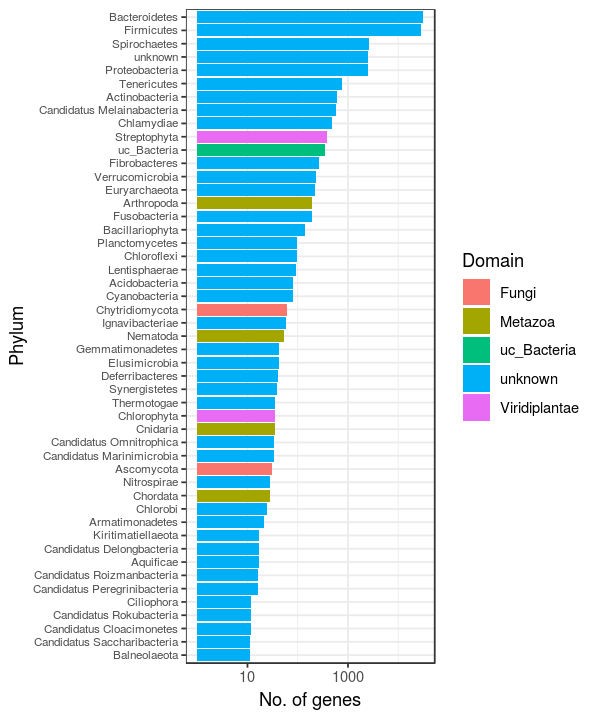

In [14]:
# plotting by phylum
p = tax_s %>%
    filter(n > 10) %>%
    mutate(Phylum = Phylum %>% reorder(n)) %>%
    ggplot(aes(Phylum, n, fill=Domain)) +
    geom_bar(stat='identity', position='dodge') +
    scale_y_log10() +
    labs(y = 'No. of genes') +
    coord_flip() +
    theme_bw() +
    theme(
        axis.text.y = element_text(size=7)
    )

dims(5,6)
plot(p)

In [15]:
# top phyla
tax_s %>% 
    arrange(-n) %>%
    head(n=30)

Domain,Phylum,n
unknown,Bacteroidetes,31765
unknown,Firmicutes,28908
unknown,Spirochaetes,2638
unknown,unknown,2557
unknown,Proteobacteria,2532
unknown,Tenericutes,748
unknown,Actinobacteria,605
unknown,Candidatus Melainabacteria,588
unknown,Chlamydiae,477
Viridiplantae,Streptophyta,383


In [16]:
# summarizing taxonomy
tax_s = tax %>%
    filter(Domain != '',
           Phylum != '',
           Class != '') %>%
    group_by(Domain, Phylum, Class) %>%
    summarize(n = seqID %>% unique %>% length) %>%
    ungroup() 
 
tax_s %>% dfhead

[1] 256   4


Domain,Phylum,Class,n
Fungi,Ascomycota,Dothideomycetes,4
Fungi,Ascomycota,Eurotiomycetes,7
Fungi,Ascomycota,Leotiomycetes,4


In [17]:
# top hits
tax_s %>% 
    arrange(-n) %>%
    head(n=30)

Domain,Phylum,Class,n
unknown,Bacteroidetes,Bacteroidia,27643
unknown,Firmicutes,Clostridia,20953
unknown,Firmicutes,unknown,2801
unknown,Firmicutes,Bacilli,2783
unknown,unknown,unknown,2525
unknown,Spirochaetes,Spirochaetia,2475
unknown,Firmicutes,Negativicutes,1557
unknown,Bacteroidetes,unknown,1539
unknown,Bacteroidetes,Flavobacteriia,1334
unknown,Proteobacteria,Alphaproteobacteria,892


## Annotations

In [18]:
# eggnog-mapper v2
cols = c(
"query_name",
"seed_eggNOG_ortholog",
"seed_ortholog_evalue",
"seed_ortholog_score",
"Predicted_taxonomic_group",
"Predicted_protein_name",
"Gene_Ontology_terms",
"EC_number",
"KEGG_ko",
"KEGG_Pathway",
"KEGG_Module",
"KEGG_Reaction",
"KEGG_rclass",
"BRITE",
"KEGG_TC",
"CAZy",
"BiGG_Reaction",
"tax_scope__eggNOG_taxonomic_level_used_for_annotation",
"eggNOG_OGs",
"bestOG",
"COG_Functional_Category",
"eggNOG_free_text_description"
)

In [19]:
F = file.path(work_dir, 'annotate', 'eggnog-mapper', 'clusters_rep-seqs.emapper.annotations.gz')
cmd = glue::glue('gunzip -c {file}', file=F, header=FALSE) 
emap_annot = fread(cmd, sep='\t') 
colnames(emap_annot) = cols
emap_annot = emap_annot %>%
    dplyr::select(-Gene_Ontology_terms)
emap_annot %>% dfhead

[1] 55873    21


query_name,seed_eggNOG_ortholog,seed_ortholog_evalue,seed_ortholog_score,Predicted_taxonomic_group,Predicted_protein_name,EC_number,KEGG_ko,KEGG_Pathway,KEGG_Module,⋯,KEGG_rclass,BRITE,KEGG_TC,CAZy,BiGG_Reaction,tax_scope__eggNOG_taxonomic_level_used_for_annotation,eggNOG_OGs,bestOG,COG_Functional_Category,eggNOG_free_text_description
c8a39c18132e4540a8f0766857ddd736,1232410.KI421421_gene3869,2.1e-11,75.1,Desulfuromonadales,ftsA,,ko:K03590,"ko04112,map04112",,⋯,,"ko00000,ko00001,ko03036,ko04812",,,,Bacteria,"1MUSR@1224,2WIQ0@28221,42MS2@68525,43SXW@69541,COG0849@1,COG0849@2",NA|NA|NA,D,Cell division protein that is involved in the assembly of the Z ring. May serve as a membrane anchor for the Z ring
2015212a4a3a4b9f904b1e666bbbf01c,537011.PREVCOP_05631,5.2e-10,69.7,Bacteroidia,dinF,,ko:K03327,,,⋯,,"ko00000,ko02000",2.A.66.1,,,Bacteria,"2FN68@200643,4NG7Q@976,COG0534@1,COG0534@2",NA|NA|NA,V,Mate efflux family protein
4cea3b3a582c4b5180747156f04e7789,748224.HMPREF9436_00728,1.9e-31,141.7,Ruminococcaceae,,,ko:K07090,,,⋯,,ko00000,,,,Bacteria,"1TRFG@1239,24AEX@186801,3WH0U@541000,COG0730@1,COG0730@2",NA|NA|NA,S,membrane transporter protein


In [20]:
# adding taxonomy info
intersect(emap_annot$query_name, tax$seqID) %>% length %>% print

emap_annot = emap_annot %>%
    left_join(tax, c('query_name'='seqID'))

emap_annot %>% dfhead

[1] 55873
[1] 55873    31


query_name,seed_eggNOG_ortholog,seed_ortholog_evalue,seed_ortholog_score,Predicted_taxonomic_group,Predicted_protein_name,EC_number,KEGG_ko,KEGG_Pathway,KEGG_Module,⋯,taxID,rank,spp,Domain,Phylum,Class,Order,Family,Genus,Species
c8a39c18132e4540a8f0766857ddd736,1232410.KI421421_gene3869,2.1e-11,75.1,Desulfuromonadales,ftsA,,ko:K03590,"ko04112,map04112",,⋯,122706,no rank,unclassified Deltaproteobacteria (miscellaneous),unknown,Proteobacteria,Deltaproteobacteria,unknown,unknown,unknown,unknown
2015212a4a3a4b9f904b1e666bbbf01c,537011.PREVCOP_05631,5.2e-10,69.7,Bacteroidia,dinF,,ko:K03327,,,⋯,1262926,species,Prevotella sp. CAG:474,unknown,Bacteroidetes,Bacteroidia,Bacteroidales,Prevotellaceae,Prevotella,Prevotella sp. CAG
4cea3b3a582c4b5180747156f04e7789,748224.HMPREF9436_00728,1.9e-31,141.7,Ruminococcaceae,,,ko:K07090,,,⋯,1882754,species,Clostridium sp. DSM 4029,unknown,Firmicutes,Clostridia,Clostridiales,Clostridiaceae,Clostridium,Clostridium sp. DSM 4029


In [21]:
n_annot_seqs = emap_annot$query_name %>% unique %>% length
cat('Number of rep seqs with eggnog-mapper annotations:', n_annot_seqs, '\n')

Number of rep seqs with eggnog-mapper annotations: 55873 


### COG functional categories

* [wiki on categories](https://ecoliwiki.org/colipedia/index.php/Clusters_of_Orthologous_Groups_%28COGs%29)

In [22]:
# summarizing by functional group
max_cat = emap_annot$COG_Functional_Category %>% unique %>% sapply(nchar) %>% max

emap_annot_s = emap_annot %>%
    dplyr::select(query_name, COG_Functional_Category) %>%
    separate(COG_Functional_Category, LETTERS[1:max_cat], sep='(?<=[A-Z])') %>%
    gather(X, COG_func_cat, -query_name) %>%
    filter(!is.na(COG_func_cat),
           COG_func_cat != '') %>%
    dplyr::select(-X) 
    
emap_annot_s %>% dfhead

Warning message:
“Expected 4 pieces. Additional pieces discarded in 2 rows [21344, 52264].”Warning message:
“Expected 4 pieces. Missing pieces filled with `NA` in 55667 rows [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, ...].”

[1] 56609     2


query_name,COG_func_cat
c8a39c18132e4540a8f0766857ddd736,D
2015212a4a3a4b9f904b1e666bbbf01c,V
4cea3b3a582c4b5180747156f04e7789,S


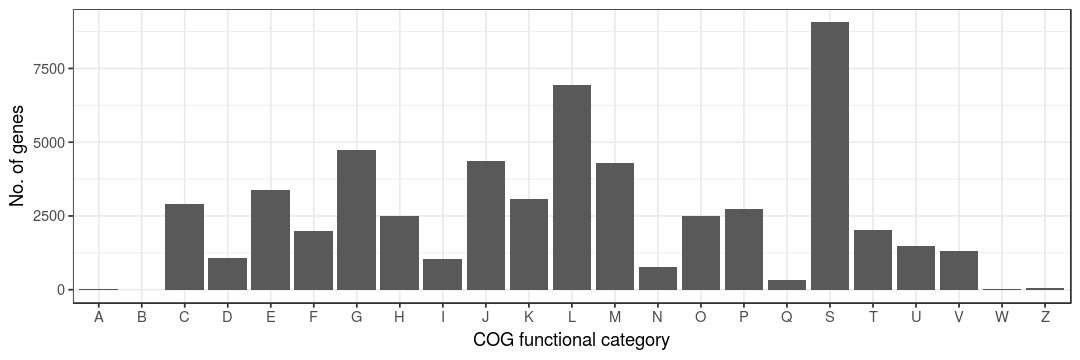

In [23]:
# plotting summary
p = emap_annot_s %>%
    ggplot(aes(COG_func_cat)) +
    geom_bar() +
    labs(x='COG functional category', y='No. of genes') +
    theme_bw()

dims(9,3)
plot(p)

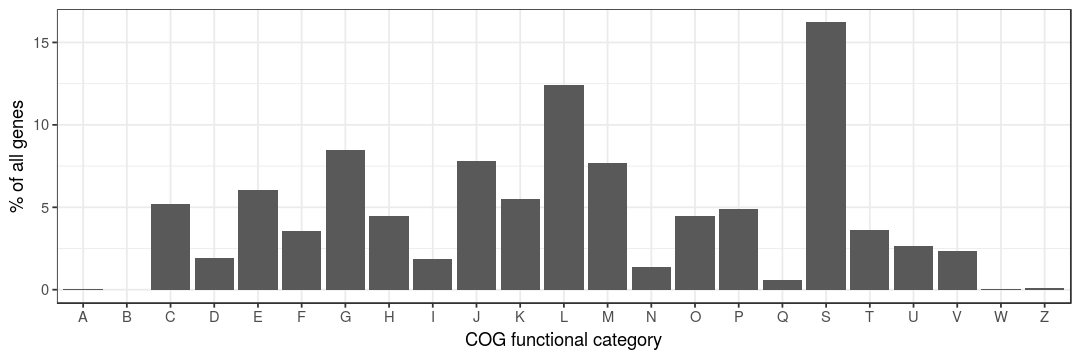

In [24]:
# plotting summary
p = emap_annot_s %>%
    group_by(COG_func_cat) %>%
    summarize(perc_abund = n() / n_annot_seqs * 100) %>%
    ungroup() %>%
    ggplot(aes(COG_func_cat, perc_abund)) +
    geom_bar(stat='identity') +
    labs(x='COG functional category', y='% of all genes') +
    theme_bw() 

dims(9,3)
plot(p)

### Grouped by taxonomy

In [25]:
max_cat = emap_annot$COG_Functional_Category %>% unique %>% sapply(nchar) %>% max

emap_annot_s = emap_annot %>%
    dplyr::select(query_name, COG_Functional_Category) %>%
    separate(COG_Functional_Category, LETTERS[1:max_cat], sep='(?<=[A-Z])') %>%
    gather(X, COG_func_cat, -query_name) %>%
    left_join(tax, c('query_name'='seqID')) %>%
    filter(!is.na(COG_func_cat),
           COG_func_cat != '') %>%
    dplyr::select(-X) 

emap_annot_s %>% dfhead

Warning message:
“Expected 4 pieces. Additional pieces discarded in 2 rows [21344, 52264].”Warning message:
“Expected 4 pieces. Missing pieces filled with `NA` in 55667 rows [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, ...].”

[1] 56609    12


query_name,COG_func_cat,taxID,rank,spp,Domain,Phylum,Class,Order,Family,Genus,Species
c8a39c18132e4540a8f0766857ddd736,D,122706,no rank,unclassified Deltaproteobacteria (miscellaneous),unknown,Proteobacteria,Deltaproteobacteria,unknown,unknown,unknown,unknown
2015212a4a3a4b9f904b1e666bbbf01c,V,1262926,species,Prevotella sp. CAG:474,unknown,Bacteroidetes,Bacteroidia,Bacteroidales,Prevotellaceae,Prevotella,Prevotella sp. CAG
4cea3b3a582c4b5180747156f04e7789,S,1882754,species,Clostridium sp. DSM 4029,unknown,Firmicutes,Clostridia,Clostridiales,Clostridiaceae,Clostridium,Clostridium sp. DSM 4029


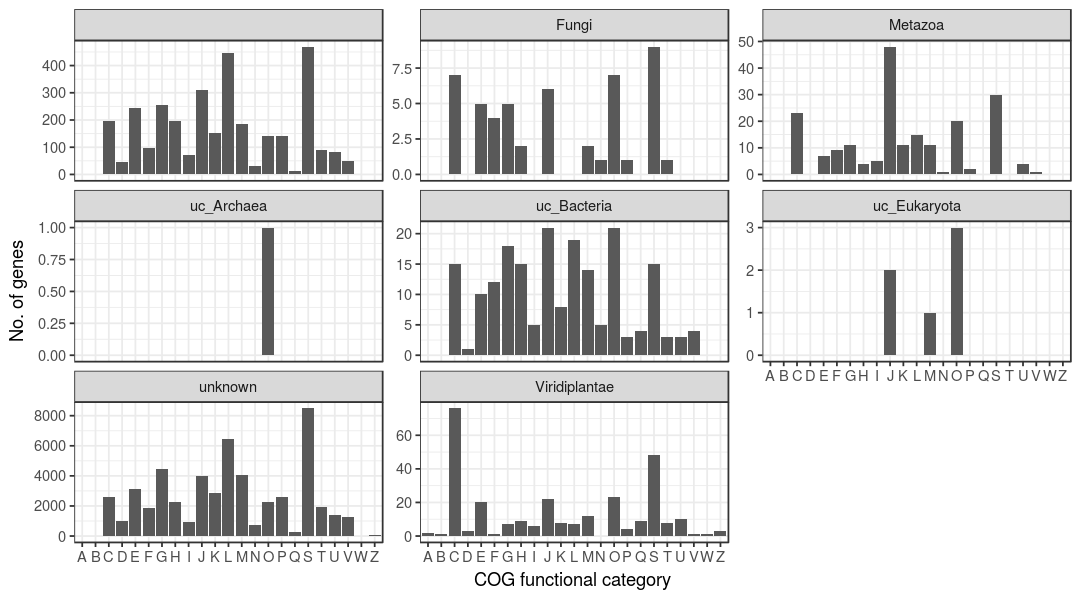

In [26]:
# plotting summary by domain
p = emap_annot_s %>%
    ggplot(aes(COG_func_cat)) +
    geom_bar() +
    facet_wrap(~ Domain, scales='free_y') +
    labs(x='COG functional category', y='No. of genes') +
    theme_bw()

dims(9,5)
plot(p)

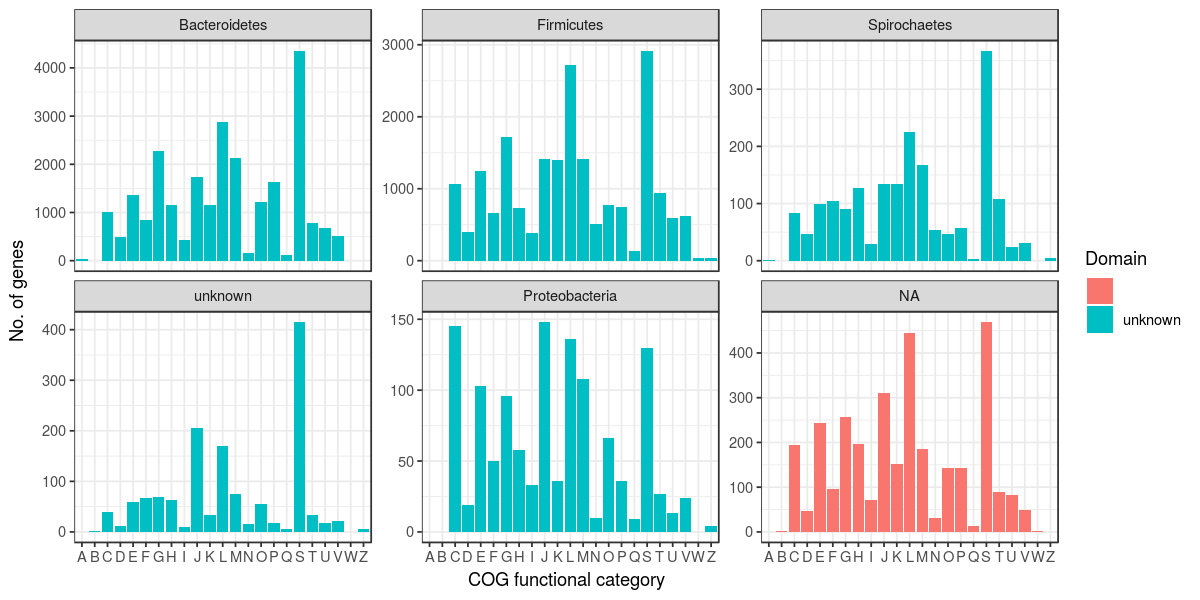

In [27]:
# plotting summary by phylum
p = emap_annot_s %>%
    group_by(Phylum) %>%
    mutate(n = n()) %>%
    ungroup() %>%
    filter(n >= 1000) %>%
    mutate(Phylum = Phylum %>% reorder(-n)) %>%
    ggplot(aes(COG_func_cat, fill=Domain)) +
    geom_bar() +
    facet_wrap(~ Phylum, scales='free_y', ncol=3) +
    labs(x='COG functional category', y='No. of genes') +
    theme_bw()

dims(10,5)
plot(p)

## humann2 db genes

In [28]:
# gene IDs
F = file.path(work_dir, 'humann2_db', 'clusters_rep-seqs_annot-index.tsv')

hm2 = fread(F, sep='\t', header=TRUE) %>%
    separate(new_name, c('UniRefID', 'Gene_length', 'Taxonomy'), sep='\\|') %>%
    separate(Taxonomy, c('Genus', 'Species'), sep='\\.s__') %>%
    separate(Species, c('Species', 'TaxID'), sep='__taxID') %>%
    mutate(Genus = gsub('^g__', '', Genus))

hm2 %>% dfhead

Warning message:
“Expected 2 pieces. Missing pieces filled with `NA` in 399 rows [10, 29, 39, 40, 42, 43, 50, 66, 79, 91, 95, 104, 114, 123, 138, 151, 162, 174, 183, 186, ...].”

[1] 4029    6


original_name,UniRefID,Gene_length,Genus,Species,TaxID
10237168079f40228d81e9e19c59a136,UniRef50_R5N045,118,Eubacterium,Eubacterium_sp_CAG_86,1262895
e0b87c5c4f764323aaafe911bab5767d,UniRef50_F9D2T3,113,Prevotella,Prevotella_marshii,862515
3be083d5385c4196980e41f5dd7c3ca3,UniRef50_C0B5U9,80,unclassified,unclassified,1263003


In [29]:
# adding taxonomy
intersect(hm2$original_name, tax$seqID) %>% length %>% print

hm2 = hm2 %>%
    left_join(tax, c('original_name'='seqID'))

hm2 %>% dfhead

[1] 4029
[1] 4029   16


original_name,UniRefID,Gene_length,Genus.x,Species.x,TaxID,taxID,rank,spp,Domain,Phylum,Class,Order,Family,Genus.y,Species.y
10237168079f40228d81e9e19c59a136,UniRef50_R5N045,118,Eubacterium,Eubacterium_sp_CAG_86,1262895,1262895,species,Eubacterium sp. CAG:86,unknown,Firmicutes,Clostridia,Clostridiales,Eubacteriaceae,Eubacterium,Eubacterium sp. CAG
e0b87c5c4f764323aaafe911bab5767d,UniRef50_F9D2T3,113,Prevotella,Prevotella_marshii,862515,862515,no rank,Prevotella marshii DSM 16973 = JCM 13450,unknown,Bacteroidetes,Bacteroidia,Bacteroidales,Prevotellaceae,Prevotella,Prevotella marshii
3be083d5385c4196980e41f5dd7c3ca3,UniRef50_C0B5U9,80,unclassified,unclassified,1263003,1263003,species,Firmicutes bacterium CAG:129,unknown,Firmicutes,unknown,unknown,unknown,unknown,Firmicutes bacterium CAG


### Summary

In [30]:
# number of unique UniRef IDs
hm2$UniRefID %>% unique %>% length

[1] 3188

In [31]:
# duplicate UniRef IDs
hm2 %>%
    group_by(UniRefID) %>%
    summarize(n = n()) %>%
    ungroup() %>%
    filter(n > 1) %>%
    arrange(-n) %>%
    head(n=30)

UniRefID,n
UniRef50_G6ATV3,54
UniRef50_U2K825,24
UniRef50_R7FBE7,17
UniRef50_J6F3M8,16
UniRef50_B4KRG8,15
UniRef50_UPI0003686C41,12
UniRef50_UPI00046EC615,12
UniRef50_D1PGD8,11
UniRef50_D4V7Q3,10
UniRef50_UPI000469E064,10


In [32]:
# number of genes with a taxID
hm2_f = hm2 %>%
    filter(!is.na(TaxID))

hm2_f %>% nrow 

[1] 3630

#### By taxonomy

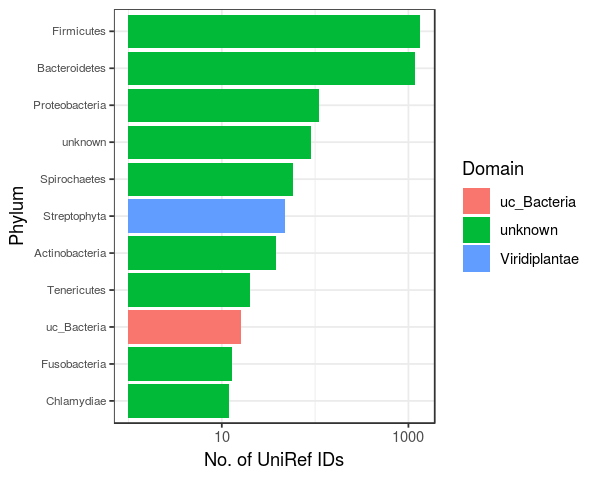

In [35]:
# number of UniRefIDs
hm2_f_s = hm2_f %>%
    group_by(Domain, Phylum) %>%
    summarize(n = UniRefID %>% unique %>% length) %>%
    ungroup()

p = hm2_f_s %>%
    filter(n >= 10) %>%
    mutate(Phylum = Phylum %>% reorder(n)) %>%
    ggplot(aes(Phylum, n, fill=Domain)) +
    geom_bar(stat='identity', position='dodge') +
    scale_y_log10() +
    coord_flip() +
    labs(y='No. of UniRef IDs') +
    theme_bw() +
    theme(
        axis.text.y = element_text(size=7)
    )
    
dims(5,4)
plot(p)

# sessionInfo

In [34]:
sessionInfo()

R version 3.4.1 (2017-06-30)
Platform: x86_64-pc-linux-gnu (64-bit)
Running under: Ubuntu 18.04.3 LTS

Matrix products: default
BLAS: /ebio/abt3_projects/software/miniconda3_gt4.4/envs/py3_physeq/lib/R/lib/libRblas.so
LAPACK: /ebio/abt3_projects/software/miniconda3_gt4.4/envs/py3_physeq/lib/R/lib/libRlapack.so

locale:
[1] en_US.UTF-8

attached base packages:
[1] stats     graphics  grDevices utils     datasets  methods   base     

other attached packages:
[1] bindrcpp_0.2.2    data.table_1.11.4 ggplot2_3.0.0     tidyr_0.8.1      
[5] dplyr_0.7.6      

loaded via a namespace (and not attached):
 [1] Rcpp_0.12.17     pillar_1.2.2     compiler_3.4.1   plyr_1.8.4      
 [5] bindr_0.1.1      base64enc_0.1-3  tools_3.4.1      digest_0.6.15   
 [9] uuid_0.1-2       jsonlite_1.5     evaluate_0.10.1  tibble_1.4.2    
[13] gtable_0.2.0     pkgconfig_2.0.1  rlang_0.2.1      IRdisplay_0.4.4 
[17] IRkernel_0.8.12  repr_0.15.0      withr_2.1.1      stringr_1.3.1   
[21] grid_3.4.1       tidyselec